## Code By: Hritik Sharma
### Task-1: To Explore Supervised Machine Learning

### Description: Predict the percentage of a student based on the no. of study hours.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Dataset
path = "http://bit.ly/w-data"
Data = pd.read_csv(path)
print("Data is successfully imported")
Data

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Printing first 5 records
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Printing first 5 records
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#Describing and evaluating the dataset
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Gaining info about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Exploratory Data Analysis

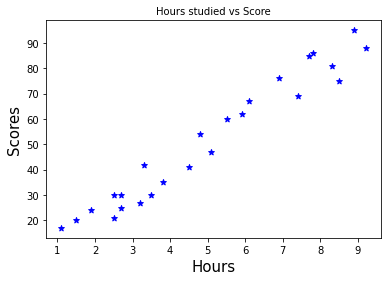

In [7]:
##Ploting A Scatter plot
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(Data.Hours,Data.Scores,color='blue',marker='*')
plt.show()

#### The above plot indicates positive linear realationship between Scores and Hours

In [8]:
#Here X is the feature we are using to predict Label Y
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Performing The Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [11]:
# Train:Test=8:2
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


## Training the Model

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [13]:
#Fitting The Data
reg.fit(X_train,Y_train)

LinearRegression()

In [14]:
#The intercept value
reg.intercept_

2.018160041434662

In [15]:
#The coefficient value
reg.coef_

array([9.91065648])

In [16]:
##the formula=> y=mx+c
Y0 = reg.coef_*X_train+reg.intercept_
Y0

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

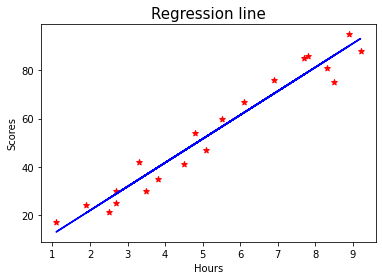

In [17]:
#Plotting on train data
plt.scatter(X_train,Y_train,color='red',marker='*')
plt.plot(X_train,Y0,color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line",fontsize=15)
plt.show()

## Testing The Model Data

In [18]:
#Predicting the scores for test data
Y_pred=reg.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
#Printing the target test value
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

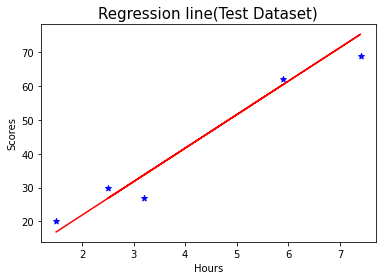

In [20]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='blue',marker='*')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Test Dataset)",fontsize=15)
plt.show()

## Comparing The Train And The Test Data.

In [21]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting the Error

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


## Predicting the Score¶

In [25]:
Prediction_score = reg.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Prediction_score)

Predicted score for a student studying 9.25 hours : [93.69173249]


## Conclusion: 

### If a student studies for 9.25 hrs/ day, he/she is predicted to secure 93.69 marks

# Thankyou, All Feedbacks Are Welcome.